<a href="https://colab.research.google.com/github/sirihasitha/Projects/blob/main/Artificial%20Neural%20Networks%20Projects/Image%20Colourisation/Colour_Quantisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [136]:
img = cv2.imread("/content/elephants.jpeg")



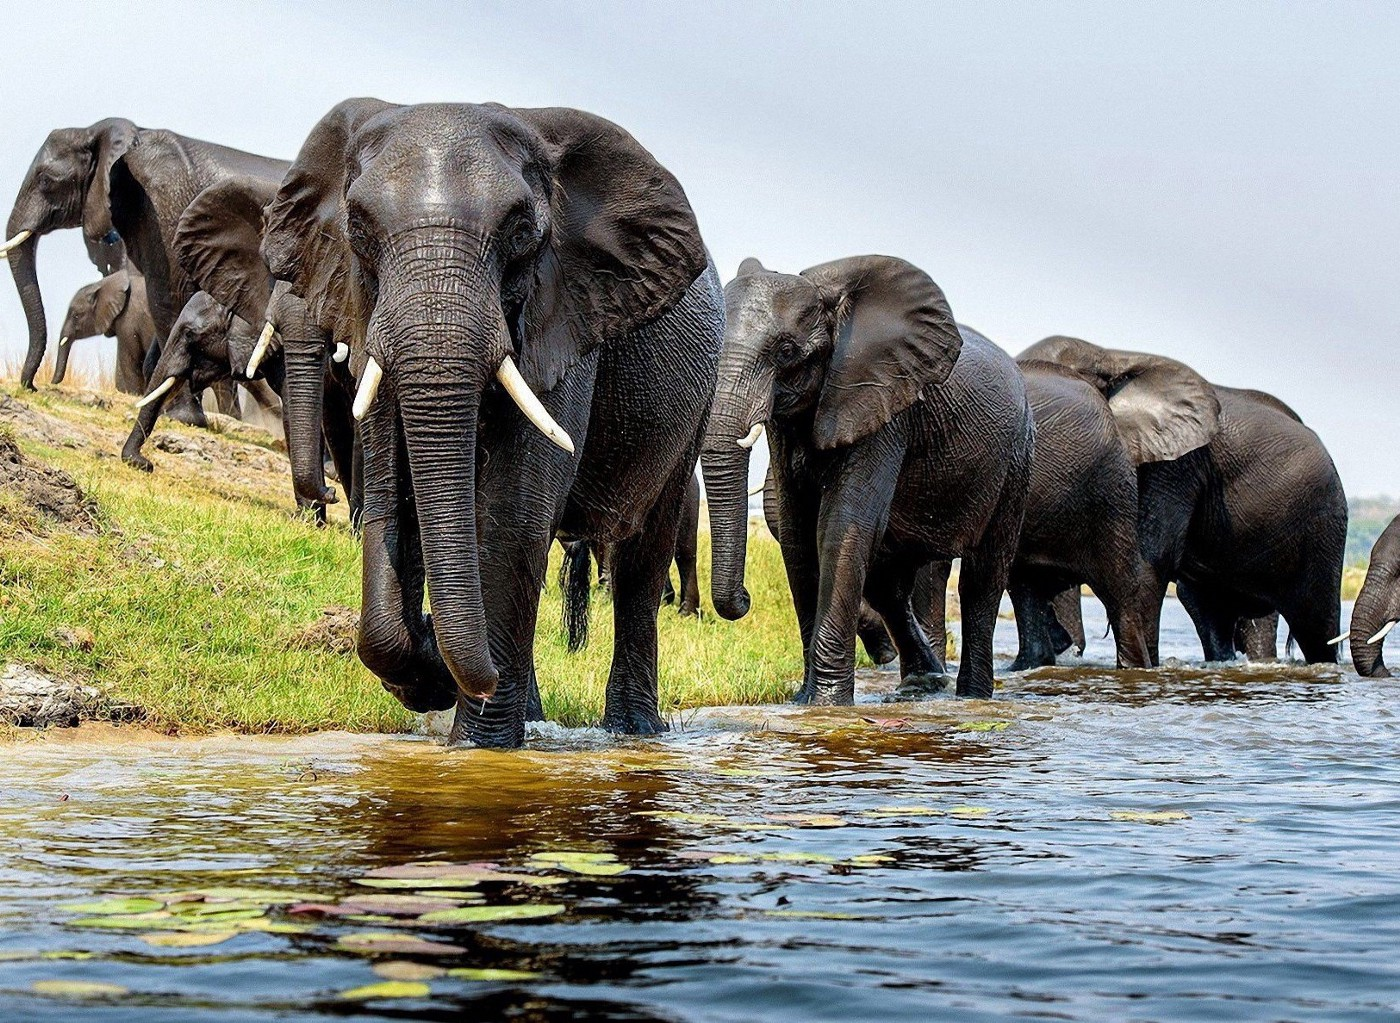

In [137]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [138]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

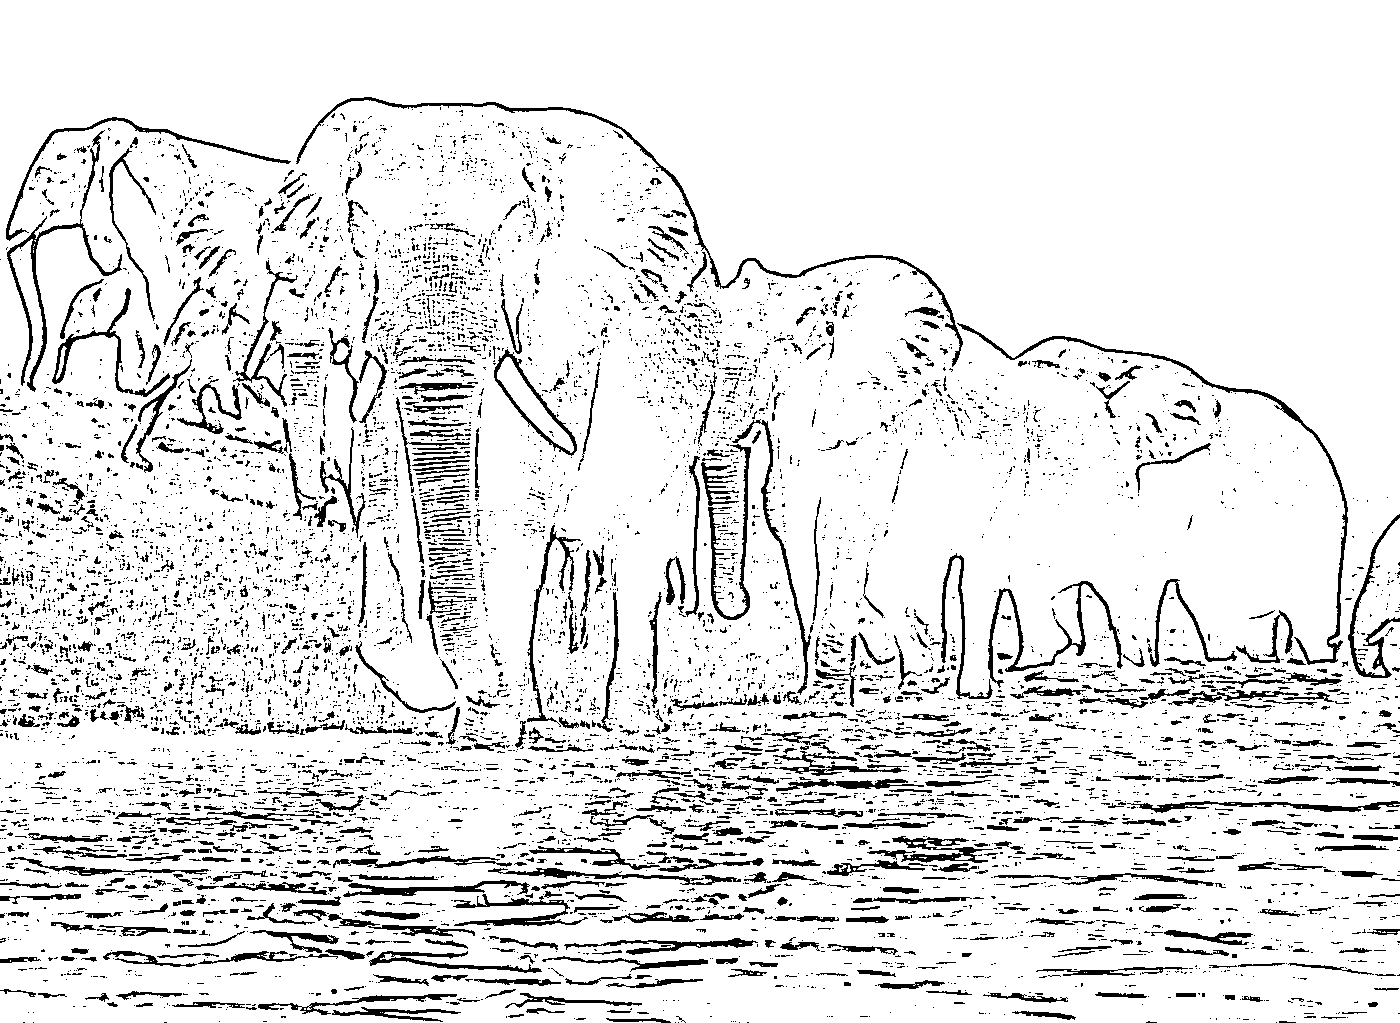

In [139]:
line_size = 7
blur_value = 7
edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

In [140]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [141]:
total_color = 9
img = color_quantization(img, total_color)

In [142]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)

In [143]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

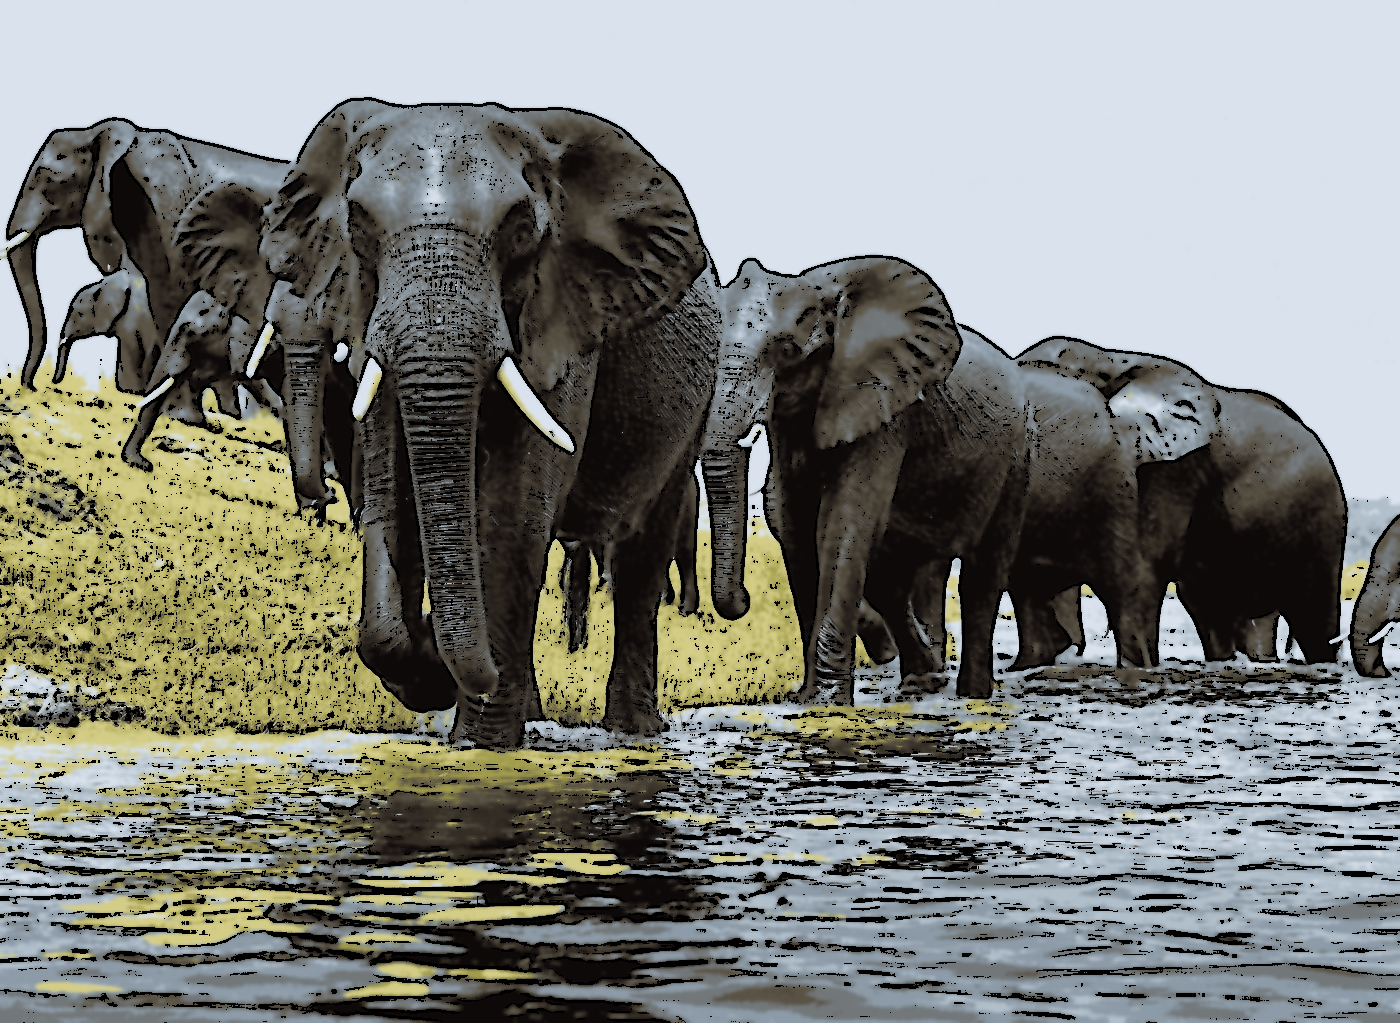

In [144]:
cv2_imshow(cartoon)
cv2.waitKey(0)
cv2.destroyAllWindows()